#Ujian Praktik Domain Natural Language Processing (NLP)

##**Perbandingan Model Naive Bayes dan SVM dalam Analisis Sentimen Cyberbullying pada Komentar di Media Sosial Instagram**

*   Nama : Annisa Mufidah Sopian
*   Kelas : Muzero



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [ ]:
# Install library Sastrawi
!pip -q install sastrawi

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv')

In [ ]:
data

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null    object
 2   Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [ ]:
print('Total Jumlah Data:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] Sentimen positif\t:', data[data.Sentiment == 'positive'].shape[0], 'data')
print('-- [-1] Sentimen negatif\t:', data[data.Sentiment == 'negative'].shape[0], 'data')

Total Jumlah Data: 400 data

terdiri dari (label):
-- [1] Sentimen positif	: 200 data
-- [-1] Sentimen negatif	: 200 data


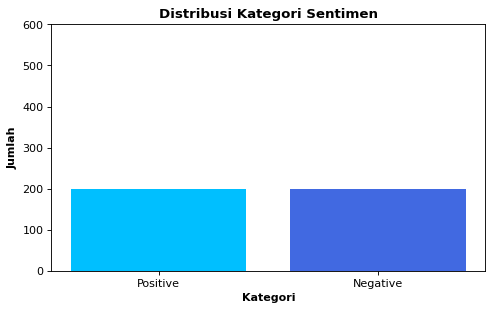

In [ ]:
height = data['Sentiment'].value_counts()
labels = ('Positive', 'Negative')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori Sentimen', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

#Text Preprocessing

##**Case Folding**

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['Instagram Comment Text'].iloc[10]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Syarat sah nikah menurut agama islam hanya 5 yaitu : adanya CPP, adanya CPW, saksi, wali nikah dan mas kawin/mahar. Perkara makeup gak manglingi bukan syarat sah pernikahan. Sekalipun gak makeup tapi syarat yg 5 tersebut terpenuhi maka pernikahannya SAH yak emak emak julids
Case folding	:  syarat sah nikah menurut agama islam hanya  yaitu  adanya cpp adanya cpw saksi wali nikah dan mas kawinmahar perkara makeup gak manglingi bukan syarat sah pernikahan sekalipun gak makeup tapi syarat yg  tersebut terpenuhi maka pernikahannya sah yak emak emak julids


##**Word Normalization**

In [ ]:
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2023-04-10 08:33:10--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2023-04-10 08:33:10 (5.70 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [ ]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

##**Stopword Removal**

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_ind = stopwords.words('indonesian')
len(stopwords_ind)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


758

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['bro', 'mas', 'utk', 'yg', 'zzzzz']                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['Instagram Comment Text'].iloc[10]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Syarat sah nikah menurut agama islam hanya 5 yaitu : adanya CPP, adanya CPW, saksi, wali nikah dan mas kawin/mahar. Perkara makeup gak manglingi bukan syarat sah pernikahan. Sekalipun gak makeup tapi syarat yg 5 tersebut terpenuhi maka pernikahannya SAH yak emak emak julids
Case folding		:  syarat sah nikah menurut agama islam hanya  yaitu  adanya cpp adanya cpw saksi wali nikah dan mas kawinmahar perkara makeup gak manglingi bukan syarat sah pernikahan sekalipun gak makeup tapi syarat yg  tersebut terpenuhi maka pernikahannya sah yak emak emak julids
Stopword removal	:  syarat sah nikah agama islam cpp cpw saksi wali nikah kawinmahar perkara makeup gak manglingi syarat sah pernikahan gak makeup syarat terpenuhi pernikahannya sah yak emak emak julids


##**Stemming**

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['Instagram Comment Text'].iloc[10]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Syarat sah nikah menurut agama islam hanya 5 yaitu : adanya CPP, adanya CPW, saksi, wali nikah dan mas kawin/mahar. Perkara makeup gak manglingi bukan syarat sah pernikahan. Sekalipun gak makeup tapi syarat yg 5 tersebut terpenuhi maka pernikahannya SAH yak emak emak julids
Case folding		:  syarat sah nikah menurut agama islam hanya  yaitu  adanya cpp adanya cpw saksi wali nikah dan mas kawinmahar perkara makeup gak manglingi bukan syarat sah pernikahan sekalipun gak makeup tapi syarat yg  tersebut terpenuhi maka pernikahannya sah yak emak emak julids
Stopword removal	:  syarat sah nikah agama islam cpp cpw saksi wali nikah kawinmahar perkara makeup gak manglingi syarat sah pernikahan gak makeup syarat terpenuhi pernikahannya sah yak emak emak julids
Stemming		:  syarat sah nikah agama islam cpp cpw saksi wali nikah kawinmahar perkara makeup gak manglingi syarat sah nikah gak makeup syarat penuh nikah sah yak emak emak julids


##**Text Preprocessing Pipeline**

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  
  return text

In [ ]:
%%time
data['clean_teks'] = data['Instagram Comment Text'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 2min 13s, sys: 463 ms, total: 2min 13s
Wall time: 2min 24s


#Feature Engineering

In [ ]:
def polarity_to_label(text):
    if text == 'positive':
        return 1
    elif text =='negative':
        return -1

In [ ]:
data['Sentiment Label'] = data['Sentiment'].apply(polarity_to_label)
data[['Sentiment','clean_teks', 'Sentiment Label']]

,Sentiment,clean_teks,Sentiment Label
0,negative,username tolol hubung nya gugur pakai hijab sy...,-1
1,negative,bodoh tatacowo banget bain balikanhadewwntar t...,-1
2,negative,kemarin mewek skr lengket duhhh labil banget s...,-1
3,negative,inti kesel att nya anak kasihan kembang psikis...,-1
4,negative,hadewwwww permpuan lgsakit jiwaknp peran utama...,-1
...,...,...,...
395,positive,bangga suami istri sela apa profesi kau juara ...,1
396,positive,apaoun kerja halal tuk nafkah keluarga semangat,1
397,positive,gojek mayoritas pegangguran kerja putus asaa t...,1
398,positive,username asli cantik ayu loh mbak temu langsun...,1


In [ ]:
# Pisahkan kolom fitur dan target
X = data['clean_teks']
y = data['Sentiment Label']

##Feature Extraction (TF-IDF & N-Gram)

In [ ]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

2315


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aamiin' 'aammiinnn' 'abal' ... 'zaman' 'zholimi' 'zina']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aamiin,aammiinnn,abal,abang,abbey,abege,abiiis,abiss,abu,ac,...,ygblaingw,yh,yoo,youtube,yra,yuk,yutub,zaman,zholimi,zina
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.237377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature_sentimenTV.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

##Feature Selection (Chi Square)

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 2315
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.712649
1,0.266905
2,1.016960
3,0.001270
4,0.488178
...,...
2310,0.171289
2311,0.214816
2312,0.184216
2313,0.226724


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.712649,aamiin
1,0.266905,aammiinnn
2,1.016960,abal
3,0.001270,abang
4,0.488178,abbey
...,...,...
2310,0.171289,yuk
2311,0.214816,yutub
2312,0.184216,zaman
2313,0.226724,zholimi


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
443,7.458519,cantik
1387,5.498420,moga
375,5.267446,bodoh
1015,4.293955,kampung
1086,4.272573,keren
...,...,...
1493,0.000074,ngefans
2292,0.000043,yaelah
1850,0.000009,sakit
2051,0.000005,sumpah


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([ True, False,  True, ..., False, False,  True])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['aamiin',
 'abal',
 'abbey',
 'abiiis',
 'acha',
 'adat',
 'admin',
 'agus',
 'ah',
 'aja',
 'ajaaa',
 'akhlak',
 'akun',
 'akuuu',
 'alah',
 'alami',
 'alay',
 'alesha',
 'alhamdulillah',
 'alim',
 'allah',
 'allahaamiin',
 'am',
 'amanda',
 'amiiii',
 'amiiin',
 'amiin',
 'amin',
 'amit',
 'amora',
 'ampuuunmalu',
 'an',
 'anakanaknya',
 'anang',
 'anda',
 'andah',
 'anehkyknya',
 'angguunn',
 'ani',
 'anjing',
 'anjir',
 'anjirrrr',
 'antem',
 'anti',
 'anyiennnnggg',
 'apa',
 'apain',
 'apaoun',
 'api',
 'apik',
 'aplg',
 'ariel',
 'artika',
 'artis',
 'ashanti',
 'asik',
 'aslikereennn',
 'asyik',
 'ato',
 'att',
 'audisi',
 'aura',
 'aurel',
 'aw',
 'awat',
 'awet',
 'ayah',
 'ayu',
 'ayuneemana',
 'ayuuterlihat',
 'az',
 'azriel',
 'babang',
 'babi',
 'babiii',
 'baca',
 'bacot',
 'badaaiik',
 'baguass',
 'bagus',
 'bagusss',
 'bagussss',
 'bahagia',
 'baik',
 'bak',
 'bakat',
 'bala',
 'balajaer',
 'balas',
 'balikanhadewwntar',
 'banci',
 'bang',
 'bangeeet',
 'bangeg',
 'ban

In [ ]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [ ]:
kbest_feature

{'username': 2216,
 'tolol': 2151,
 'nya': 1558,
 'pakai': 1622,
 'hijab': 838,
 'panas': 1629,
 'otak': 1612,
 'sih': 1976,
 'ya': 2284,
 'komentar': 1129,
 'bodoh': 375,
 'tatacowo': 2093,
 'banget': 217,
 'balikanhadewwntar': 207,
 'nyalahin': 1566,
 'tuh': 2164,
 'cowopadahal': 498,
 'kitenya': 1109,
 'oon': 1597,
 'mbak': 1321,
 'ato': 149,
 'sensasi': 1933,
 'biar': 335,
 'att': 150,
 'kasihan': 1024,
 'orang': 1604,
 'bener': 300,
 'anda': 86,
 'benci': 298,
 'tau': 2094,
 'nama': 1453,
 'manusia': 1290,
 'suka': 2046,
 'haters': 815,
 'permpuan': 1692,
 'artis': 131,
 'pantesan': 1636,
 'tinggalin': 2143,
 'laki': 1171,
 'berfikir': 305,
 'perempuan': 1684,
 'ngurus': 1519,
 'becus': 269,
 'mending': 1334,
 'biasa': 339,
 'balajaer': 203,
 'nyampah': 1570,
 'ig': 867,
 'asik': 140,
 'lagu': 1167,
 'laknat': 1175,
 'goda': 751,
 'laku': 1176,
 'bela': 286,
 'jiwa': 973,
 'indonesia': 883,
 'buruk': 426,
 'pilih': 1714,
 'kelas': 1053,
 'ayu': 167,
 'janda': 940,
 'anyiennnnggg':

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aamiin,abal,abbey,abiiis,acha,adat,admin,agus,ah,aja,...,yaela,yah,yatuhan,yeee,yeskirain,yesss,yesssssss,youtube,yra,zina
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature_senitmenTV.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

##Modelling(Machine Learning dengan Multinomial Naive Bayes)

In [ ]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.naive_bayes import MultinomialNB           
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur
# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.25, random_state=42)

In [ ]:
# Training the model
algorithm = MultinomialNB()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 
# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
        1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1])

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1])

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 94
Jumlah prediksi salah	: 6
Akurasi pengujian	: 94.0 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[46  6]
 [ 0 48]]


In [ ]:
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

          -1       1.00      0.88      0.94        52
           1       0.89      1.00      0.94        48

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



In [ ]:
# Cross Validation
from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)
cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)
print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.9    0.9375 0.925  0.9625 0.9125 0.9375 0.9    0.9    0.95   0.975 ] 

Rata-rata akurasi pada cross validation: 0.9299999999999999


##Modelling(Machine Learning dengan Support Vector Machine)

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
model2 = clf.fit(X_train, y_train)

# Simpan model hasil traning
dump(model2, filename='model_2.joblib')

['model_2.joblib']

In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model2_pred = model2.predict(X_test)

# Tampilkan hasil prediksi label dari model
model2_pred

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
        1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1])

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1])

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model2_pred == y_test).sum()
prediksi_salah = (model2_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 93
Jumlah prediksi salah	: 7
Akurasi pengujian	: 93.0 %


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model2_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[46  6]
 [ 1 47]]


In [ ]:
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(y_test, model2_pred))

Classification report:
               precision    recall  f1-score   support

          -1       0.98      0.88      0.93        52
           1       0.89      0.98      0.93        48

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [ ]:
# Cross Validation
from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)
cv_accuracy = (cross_val_score(model2, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.925  0.9625 0.9375 0.95   0.8875 0.95   0.9375 0.8875 0.9375 0.9625] 

Rata-rata akurasi pada cross validation: 0.9337500000000001


##Kesimpulan



*   Dengan menggunakan model Naive Bayes pada splitting data 70:25, didapatkan akurasi pengujian sebesar 94%, dan rata-rata akurasi pada cross validation sebesar 92,9%

*   Dengan menggunakan model Support Vector Machine pada splitting data 70:25, didapatkan akurasi sebesar 93%, dan rata-rata akurasi pada cross validation sebesar 93,3%

*   Pada studi kasus ini, Support Vector Machine menghasilkan akurasi yang lebih baik dibandingkan dengan Naive Bayes





